# 単純なフィルタを適用させてみる

In [1]:
import librosa
import librosa.display
import numpy as np 
import glob
import os
import matplotlib.pyplot as plt
import wavio
import IPython.display

import utils
import plot

/Users/oharasoh/study/bandai/venv/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Users/oharasoh/study/bandai/venv/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [59]:
raw_specs, noised_specs = utils.load_spectrograms("../data")

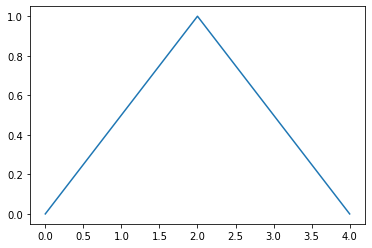

In [60]:
plt.plot(np.hanning(5))

In [61]:
def cut_weak_signal(spec, k=4):
    max_amp = spec.max()
    spec = np.where(np.log10(max_amp) - np.log10(spec) > k, spec*0.20, spec)
    return spec


def take_moving_average(spec, winfunc=np.hanning, k=5):
    """各周波数ごとに、時間軸方向に移動平均をとる
    単にならすのではなく、窓関数を使って真ん中にピークが来るような平滑化を行う
    """
    window = winfunc(k) / winfunc(k).sum()  # 合計が1になるよう正規化する
    for freq_idx in range(spec.shape[0]):
        spec[freq_idx] = np.convolve(spec[freq_idx], window, mode='same')
    return spec


def median_filter(x, k=3):
    """メディアンフィルタの適用
    Parameters:
    ==========
    x: 2d-ndarray.dtype is 'float64'. The spectrogram of sound.
    k: int. kernel size. k should be odd number.
    """
    if k % 2 == 0:
        raise ValueError("The kernel size should be odd not even number.")
    padded_x = np.zeros([x.shape[0], x.shape[1] + k - 1])
    padded_x[:, k//2-1:-k//2] = x
    for t in range(x.shape[1]):
        x[:, t] = np.median(
            padded_x[:, t:t+k], axis=1) * x[:, t]/np.abs(x[:, t])
    return x   

In [69]:
def convert_func(x):
    x = cut_weak_signal(x, k=4)
    x = median_filter(x, k=3)
    x = take_moving_average(spec, k=3)
    x = cut_weak_signal(x, k=5)
    return x  

/Users/oharasoh/study/bandai/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/oharasoh/study/bandai/venv/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


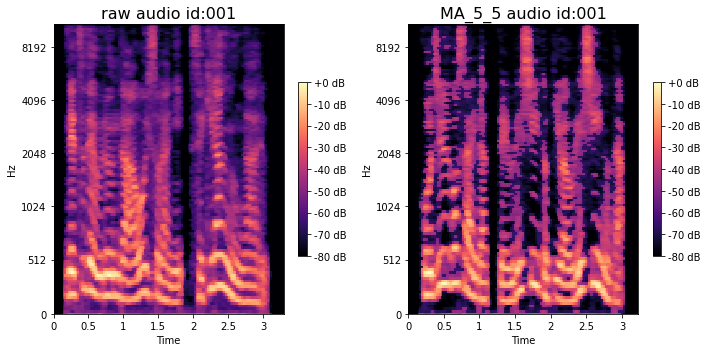

In [71]:
utils.show_and_save(noised_specs, save_name='MA_5_5',  ids=["001"], convert_func=convert_func)

In [70]:
save_name = "MA_5__5"
save_dir = f"../result/{save_name}"
os.makedirs(save_dir, exist_ok=True)
for idx in noised_specs:
    spec = noised_specs[idx]
    # spec = cut_weak_signal(spec, threshold=1)
    spec = convert_func(spec)
    file_name = f"tgt_{idx:03d}.npy"
    save_path = os.path.join(save_dir, file_name)
    np.save(save_path, spec)

/Users/oharasoh/study/bandai/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/oharasoh/study/bandai/venv/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
utils.show_and_save(raw_specs, save_name='cut_weak_signal_2',  ids=["001", "002"], convert_func=)